In [4]:
% pylab inline
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import matplotlib
import sympy as sy
import scipy as sp
import numpy as np
import math
import os

Populating the interactive namespace from numpy and matplotlib


In [5]:
def smooth(data, box_pts): 
#Smoothing function
    box = np.ones(box_pts)/box_pts
    data_smooth = np.convolve(data, box, mode='same')
    return data_smooth

def shift(x,sample): 
    t=0
    m=1
    while np.mean(x[t:sample+t]) < 1:
        i = np.mean(x[t:sample+t])
        if (i < m):
            m = i
        t=t+sample
    return -1*m

def data_array(data): #getdata from GOLEM database
    datas = urllib.request.urlopen(data)
    lines = datas.readlines()
    for k,l in enumerate(lines):
        lines[k] = l.strip().split()
        for i,j in enumerate(lines[k]):
            try: 
                lines[k][i] = float(j)
            except 'VallueError':
                print('not a number')
    return array(lines)

In [6]:
def current_time(shot):
	current = data_array('http://golem.fjfi.cvut.cz/utils/data/%i/plasma_current'%shot)
	return current[:,0]

def current_data(shot):
	current = data_array('http://golem.fjfi.cvut.cz/utils/data/%i/plasma_current'%shot)
	return current[:,1]

def digital_time(shot):
	digital = data_array('http://golem.fjfi.cvut.cz/utils/data/%i/electron_density'%shot)
	return digital[:,0]

def digital_data(shot):
	digital = data_array('http://golem.fjfi.cvut.cz/utils/data/%i/electron_density'%shot)
	return digital[:,1]

def green_time(shot):
	green = data_array('http://golem.fjfi.cvut.cz/utils/data/%i/greenwald_density'%shot)
	return green[:,0]

def green_data(shot):
	green = data_array('http://golem.fjfi.cvut.cz/utils/data/%i/greenwald_density'%shot)
	return green[:,1]

In [7]:
repeat19330 = [24041,24042,24043,24044,24045,24046,24047]
Ucd_Scan = [24047,24048,24049,24050]
Ucd 	 = [500  ,450  ,400  ,350] #pch=10 mPa

pch_Scan = [24047,24052,24055,24057,24058,24062,24061]
pch 	 = [10	 ,12   ,14	 ,16   ,18	 ,20   ,24] #Ucd=500 V

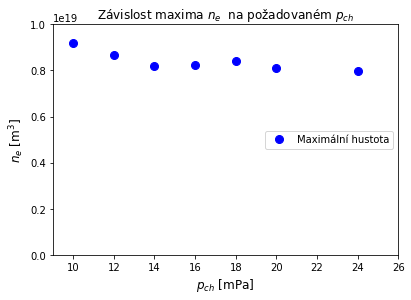

In [8]:
pch_dens = [max(digital_data(x)) for x in pch_Scan]

fig = plt.figure()
axes1 = fig.add_axes([0.10, 0.10, 0.8, 0.8])
axes1.set_xlabel('$p_{ch}$ [mPa]',fontsize=12)
axes1.set_ylabel('$n_{e}$ [m$^{3}$]',fontsize=12)
axes1.plot(pch, pch_dens,'o' ,markersize=8, color='b', label="Maximální hustota")
#axes1.plot(analog_time, cal*(analog_data_smooth + pos),lw=3, color='r', label="Zpracovaná analogová data " )
axes1.set_xlim(9,26)
axes1.set_ylim(0,1e19)
axes1.set_title('Závislost maxima $n_{e}$  na požadovaném $p_{ch}$')
plt.legend(loc=5,fontsize='medium')
plt.show()



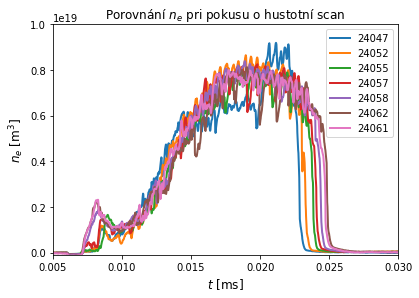

In [9]:
fig2 = plt.figure()
axes2 = fig2.add_axes([0.10, 0.10, 0.8, 0.8])
axes2.set_xlabel('$t$ [ms]',fontsize=12)
axes2.set_ylabel('$n_{e}$ [m$^{3}$]',fontsize=12)
for x in pch_Scan:
	axes2.plot(digital_time(x),digital_data(x) ,lw=2, label="%.0f"%(x))

axes2.set_ylim(-0.01e19,1e19)
axes2.set_xlim(0.005,0.030)
axes2.set_title('Porovnání $n_{e}$ pri pokusu o hustotní scan')
plt.legend(loc=1,fontsize='medium')
plt.show()


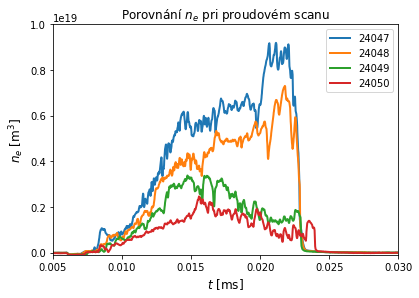

In [10]:
fig3 = plt.figure()
axes3 = fig3.add_axes([0.10, 0.10, 0.8, 0.8])
axes3.set_xlabel('$t$ [ms]',fontsize=12)
axes3.set_ylabel('$n_{e}$ [m$^{3}$]',fontsize=12)
for x in Ucd_Scan:
	axes3.plot(digital_time(x),digital_data(x) ,lw=2, label="%.0f"%(x))

axes3.set_ylim(-0.01e19,1e19)
axes3.set_xlim(0.005,0.030)
axes3.set_title('Porovnání $n_{e}$ pri proudovém scanu')
plt.legend(loc=1,fontsize='medium')
plt.show()

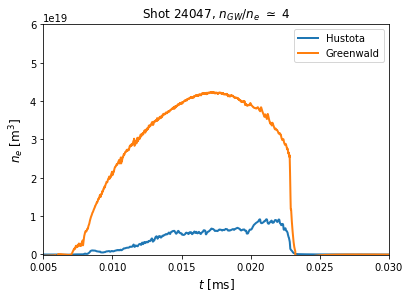

In [11]:
fig4 = plt.figure()
axes4 = fig4.add_axes([0.10, 0.10, 0.8, 0.8])
axes4.set_xlabel('$t$ [ms]',fontsize=12)
axes4.set_ylabel('$n_{e}$ [m$^{3}$]',fontsize=12)
axes4.plot(digital_time(24047),digital_data(24047) ,lw=2, label="Hustota")
axes4.plot(green_time(24047),green_data(24047) ,lw=2, label="Greenwald")

axes4.set_ylim(-0.01e19,0.6e20)
axes4.set_xlim(0.005,0.030)
axes4.set_title('Shot 24047, $n_{GW}/n_{e}\ \simeq \ 4 $ ')
plt.legend(loc=1,fontsize='medium')

plt.show()